<a href="https://colab.research.google.com/github/Dewwbe/Deep-Learning-lab-02/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

Target labels:  [2 5 4 9 7 2 1 1 4 6]


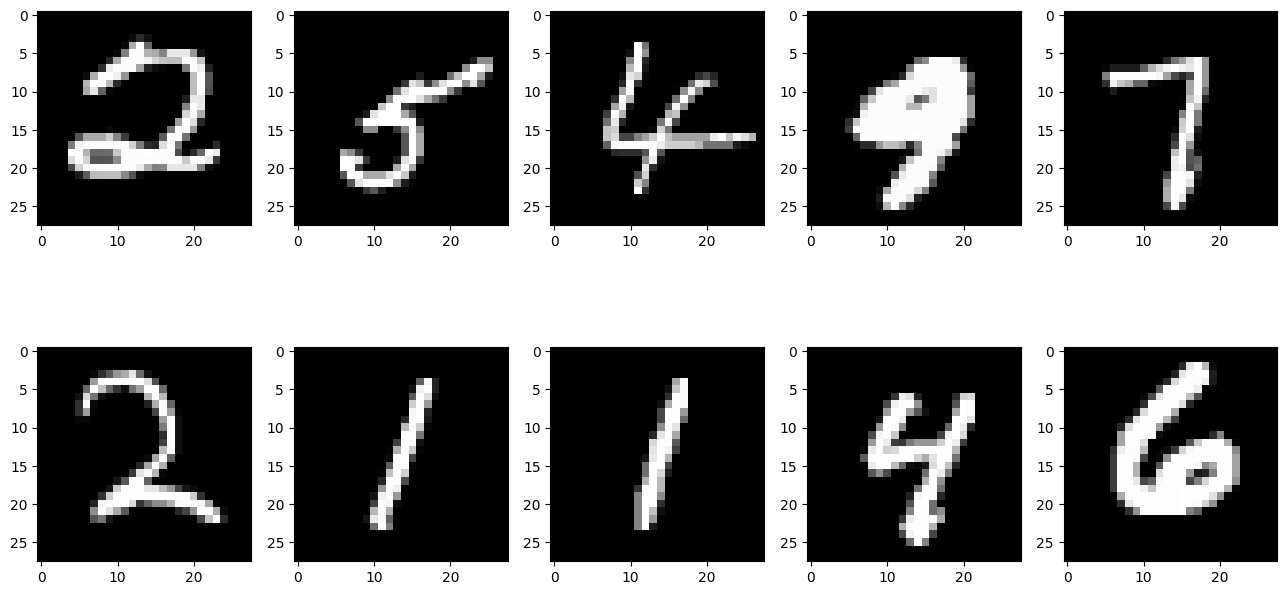

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8343 - loss: 0.5427
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9592 - loss: 0.1350
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9707 - loss: 0.0964
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9769 - loss: 0.0731
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9807 - loss: 0.0599
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9850 - loss: 0.0468
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9860 - loss: 0.0420
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9894 - loss: 0.0337
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9901 - loss: 0.0304
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9906 - loss: 0.0281


Plot the loss and accuracy graphs

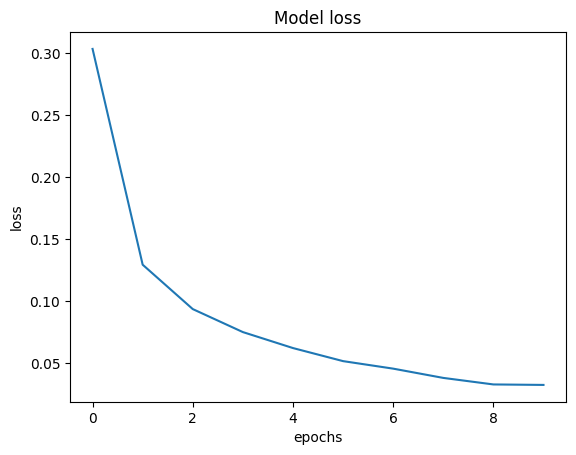

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

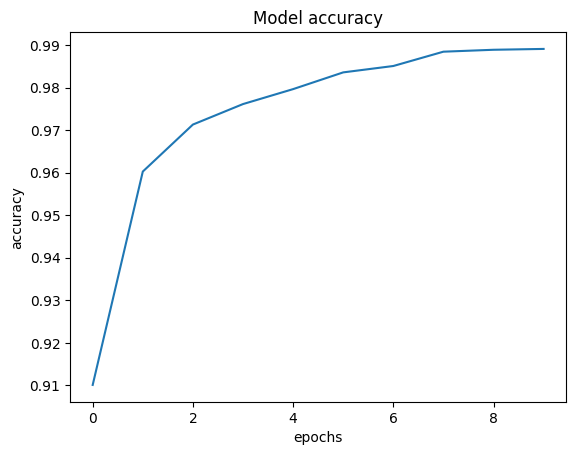

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.1106
Loss of the Test dataset is: 0.09772263467311859
Accuracy of the test dataset is: 0.9742000102996826


Save the model weights

In [13]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

In [14]:
# If TensorFlow isn't present in your runtime, install it (Colab often has it preinstalled).
try:
    import tensorflow as tf
except ModuleNotFoundError:
    !pip -q install --upgrade tensorflow
    import tensorflow as tf

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize to [0,1] and flatten to vectors (784 features)
x_train = (x_train.astype("float32") / 255.0).reshape(-1, 28*28)
x_test  = (x_test.astype("float32")  / 255.0).reshape(-1, 28*28)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)  # (60000, 784) (60000,) (10000, 784) (10000,)


(60000, 784) (60000,) (10000, 784) (10000,)


In [15]:
def build_mlp(
    input_dim=784,
    hidden_units=(256, 128),
    activation="relu",         # try "tanh" too
    dropout=0.2,
    l1=0.0, l2=0.0,            # regularization strengths
    num_classes=10
):
    reg = regularizers.l1_l2(l1=l1, l2=l2) if (l1>0.0 or l2>0.0) else None

    model = keras.Sequential(name="mnist_mlp")
    model.add(layers.Input(shape=(input_dim,)))

    for h in hidden_units:
        model.add(layers.Dense(h, activation=activation, kernel_regularizer=reg, bias_regularizer=None))
        if dropout and dropout > 0:
            model.add(layers.Dropout(dropout))

    model.add(layers.Dense(num_classes, activation="softmax", kernel_regularizer=reg))
    return model


In [16]:
def train_and_eval(model, lr=1e-3, epochs=15, batch_size=128, verbose=0):
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    es = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
    history = model.fit(
        x_train, y_train,
        validation_split=0.1,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[es],
        verbose=verbose
    )
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    return test_acc, history

# Search space (keep small to run quickly; expand if you have time/GPU)
hidden_space   = [(256,128), (512,256)]
activation_spc = ["relu", "tanh"]
dropout_spc    = [0.0, 0.2]
lr_spc         = [1e-3, 5e-4]
batch_spc      = [128, 256]

best = {"acc": 0.0, "cfg": None}

for hidden in hidden_space:
    for act in activation_spc:
        for do in dropout_spc:
            for lr in lr_spc:
                for bs in batch_spc:
                    model = build_mlp(hidden_units=hidden, activation=act, dropout=do)
                    acc, _ = train_and_eval(model, lr=lr, epochs=20, batch_size=bs, verbose=0)
                    print(f"hidden={hidden}, act={act}, drop={do}, lr={lr}, bs={bs} -> test_acc={acc:.4f}")
                    if acc > best["acc"]:
                        best["acc"] = acc
                        best["cfg"] = (hidden, act, do, lr, bs)

print("\nBEST:", best)


hidden=(256, 128), act=relu, drop=0.0, lr=0.001, bs=128 -> test_acc=0.9753
hidden=(256, 128), act=relu, drop=0.0, lr=0.001, bs=256 -> test_acc=0.9785
hidden=(256, 128), act=relu, drop=0.0, lr=0.0005, bs=128 -> test_acc=0.9773
hidden=(256, 128), act=relu, drop=0.0, lr=0.0005, bs=256 -> test_acc=0.9759
hidden=(256, 128), act=relu, drop=0.2, lr=0.001, bs=128 -> test_acc=0.9804
hidden=(256, 128), act=relu, drop=0.2, lr=0.001, bs=256 -> test_acc=0.9829
hidden=(256, 128), act=relu, drop=0.2, lr=0.0005, bs=128 -> test_acc=0.9814
hidden=(256, 128), act=relu, drop=0.2, lr=0.0005, bs=256 -> test_acc=0.9802
hidden=(256, 128), act=tanh, drop=0.0, lr=0.001, bs=128 -> test_acc=0.9751
hidden=(256, 128), act=tanh, drop=0.0, lr=0.001, bs=256 -> test_acc=0.9761
hidden=(256, 128), act=tanh, drop=0.0, lr=0.0005, bs=128 -> test_acc=0.9788
hidden=(256, 128), act=tanh, drop=0.0, lr=0.0005, bs=256 -> test_acc=0.9773
hidden=(256, 128), act=tanh, drop=0.2, lr=0.001, bs=128 -> test_acc=0.9791
hidden=(256, 128), 